                                                 Analyse de la situation matrimoniale 

In [29]:
# Importer les bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le fichier CSV depuis l'URL
url = 'https://raw.githubusercontent.com/SORADATA/Python/refs/heads/main/Dataset/divorce.csv'
divorce = pd.read_csv(url)

# Afficher un aperçu des premières lignes du DataFrame
print("Aperçu des premières lignes du dataset :")
print(divorce.head(), "\n")

# Afficher les informations sur le DataFrame
print("Informations sur le dataset :")
divorce.info()
print("\n")

# Afficher les statistiques descriptives du dataset
print("Statistiques descriptives :")
print(divorce.describe(), "\n")



Aperçu des premières lignes du dataset :
  divorce_date     dob_man education_man  income_man   dob_woman  \
0   2006-09-06  1975-12-18     Secondary      2000.0  1983-08-01   
1   2008-01-02  1976-11-17  Professional      6000.0  1977-03-13   
2   2011-01-02  1969-04-06   Preparatory      5000.0  1970-02-16   
3   2011-01-02  1979-11-13     Secondary     12000.0  1981-05-13   
4   2011-01-02  1982-09-20  Professional      6000.0  1988-01-30   

  education_woman  income_woman marriage_date  marriage_duration  num_kids  
0       Secondary        1800.0    2000-06-26                5.0       1.0  
1    Professional        6000.0    2001-09-02                7.0       NaN  
2    Professional        5000.0    2000-02-02                2.0       2.0  
3       Secondary       12000.0    2006-05-13                2.0       NaN  
4    Professional       10000.0    2007-08-06                3.0       NaN   

Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 e

                                        Les corrélations 

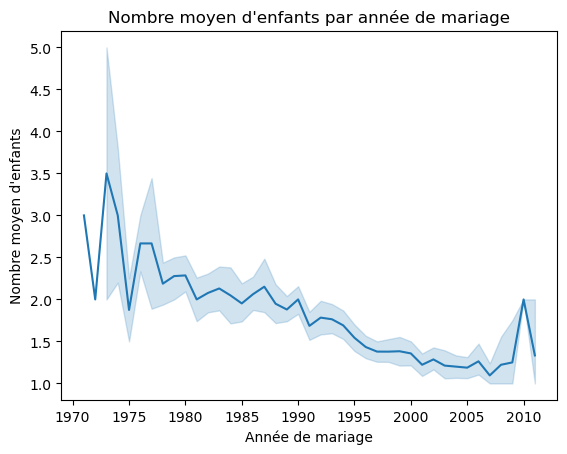

In [33]:

Divorce["marriage_date"] = pd.to_datetime(Divorce["marriage_date"])

# Définir la colonne "marriage_year"
Divorce["marriage_year"] = Divorce["marriage_date"].dt.year

# Créer un graphique en ligne montrant le nombre moyen d'enfants par année de mariage
sns.lineplot(data=Divorce, x="marriage_year", y="num_kids")

# Afficher le graphique
plt.xlabel("Année de mariage")
plt.ylabel("Nombre moyen d'enfants")
plt.title("Nombre moyen d'enfants par année de mariage")
plt.show()


In [37]:
divorce.corr

<bound method DataFrame.corr of      divorce_date     dob_man education_man  income_man   dob_woman  \
0      2006-09-06  1975-12-18     Secondary      2000.0  1983-08-01   
1      2008-01-02  1976-11-17  Professional      6000.0  1977-03-13   
2      2011-01-02  1969-04-06   Preparatory      5000.0  1970-02-16   
3      2011-01-02  1979-11-13     Secondary     12000.0  1981-05-13   
4      2011-01-02  1982-09-20  Professional      6000.0  1988-01-30   
...           ...         ...           ...         ...         ...   
2204   2006-10-31  1969-11-27  Professional      6000.0  1975-09-01   
2205   2006-10-31  1970-09-17  Professional      6000.0  1977-07-22   
2206   2011-10-31  1976-03-11  Professional      8000.0  1978-12-28   
2207   2012-10-31  1977-10-29  Professional     12500.0  1978-12-01   
2208   2013-12-31  1960-06-22  Professional     20000.0  1972-01-22   

     education_woman  income_woman marriage_date  marriage_duration  num_kids  
0          Secondary        1800.0 

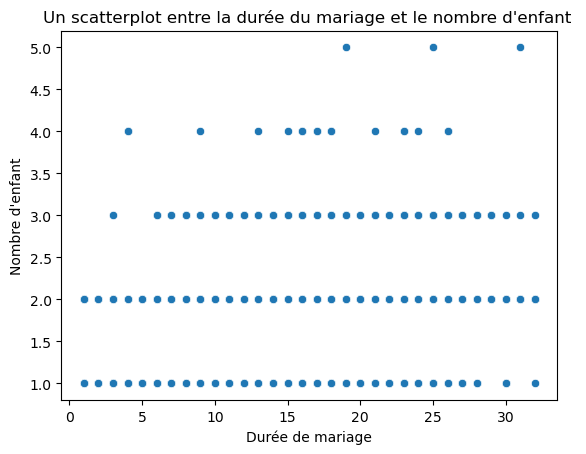

In [43]:
# Create the scatterplot
sns.scatterplot(data=divorce, x="marriage_duration",y= "num_kids")
plt.xlabel("Durée de mariage")
plt.ylabel("Nombre d'enfant")
plt.title("Un scatterplot entre la durée du mariage et le nombre d'enfant ")
plt.show()

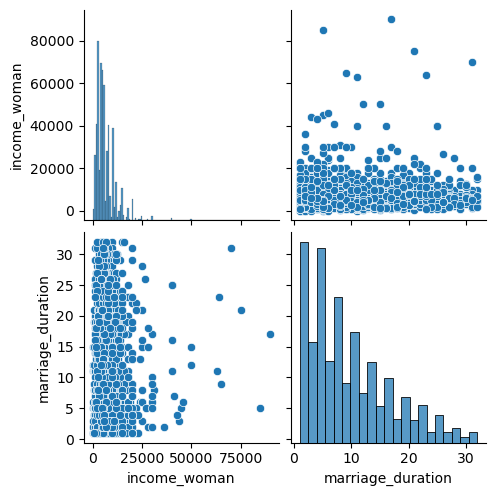

In [53]:
# Create a pairplot for income_woman and marriage_duration
sns.pairplot(data=divorce, vars=["income_woman", "marriage_duration"])
plt.show()

divorce_date                 object
dob_man                      object
education_man                object
income_man                  float64
dob_woman                    object
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
marriage_year                 int32
dtype: object


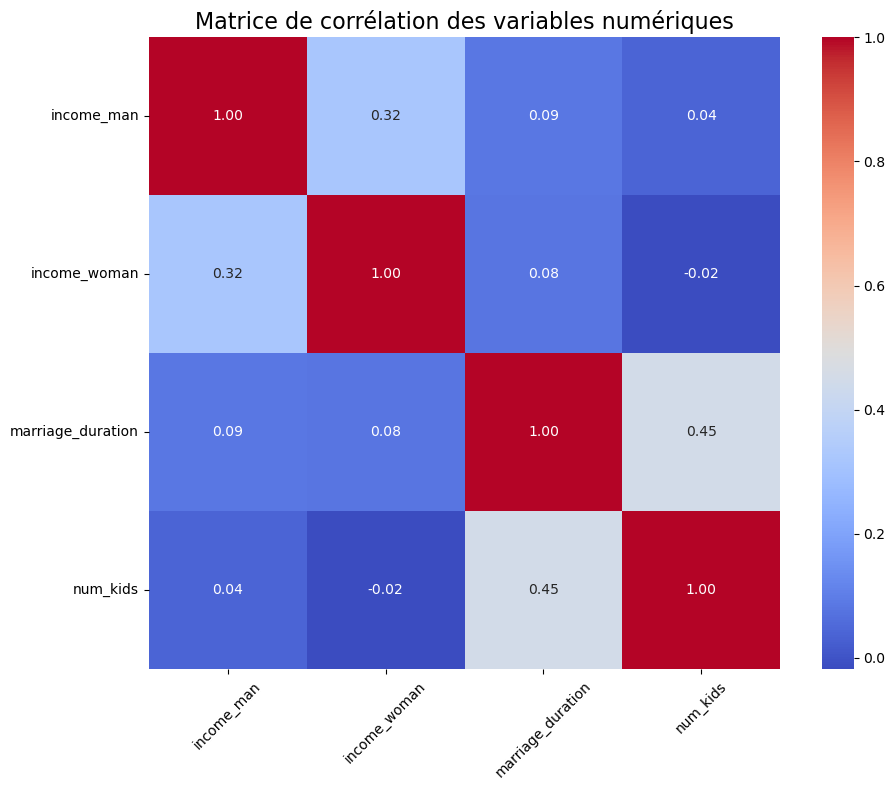

In [77]:
# Vérifier les types de colonnes
print(divorce.dtypes)

# Sélectionner uniquement les colonnes numériques
numeric_cols = divorce.select_dtypes(include=['float64', 'int64']).columns

# Calculer la matrice de corrélation uniquement pour les colonnes numériques
corr_matrix = divorce[numeric_cols].corr()

# Créer une heatmap pour visualiser les corrélations
plt.figure(figsize=(10, 8))  # Ajuster la taille de la figure
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)

# Ajouter des titres et des labels
plt.title("Matrice de corrélation des variables numériques", fontsize=16)
plt.xticks(rotation=45)  # Rotation des labels de l'axe x pour une meilleure lisibilité
plt.yticks(rotation=0)   # Rotation des labels de l'axe y pour une meilleure lisibilité
plt.tight_layout()       # Ajuster les sous-éléments pour éviter le chevauchement
plt.show()


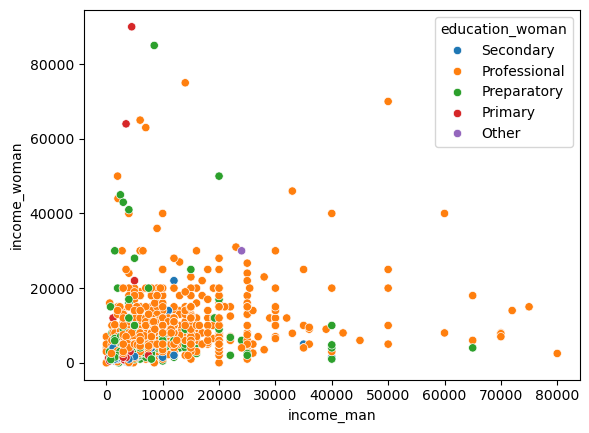

In [85]:
# Create the scatter plot with hue for education_woman
sns.scatterplot(data=divorce, x="income_man", y="income_woman", hue="education_woman")
plt.show()

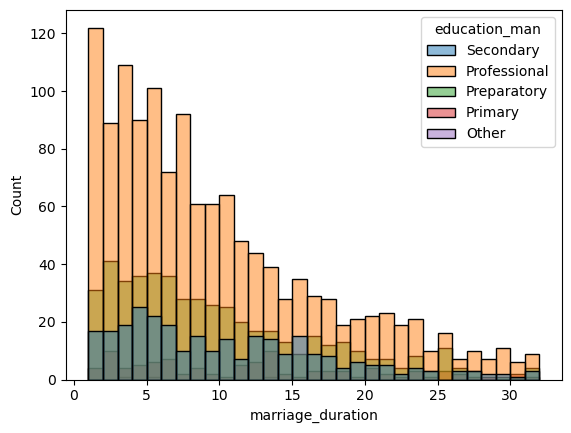

In [87]:
sns.histplot(data=divorce, x="marriage_duration", hue="education_man", binwidth=1)
plt.show()

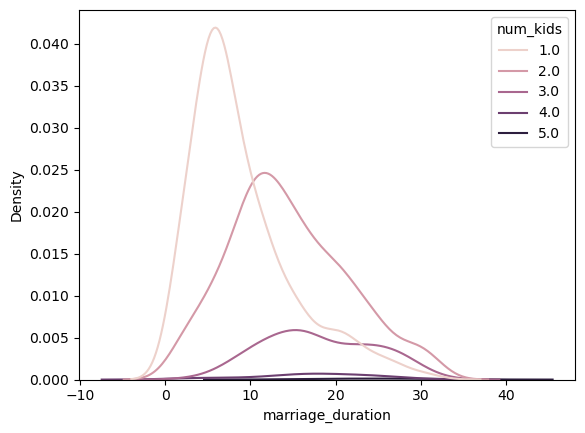

In [91]:
# A KDE plot  permet de visualiser la distribution de la durée du mariage en fonction du nombre d'enfants
sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids")
plt.show()

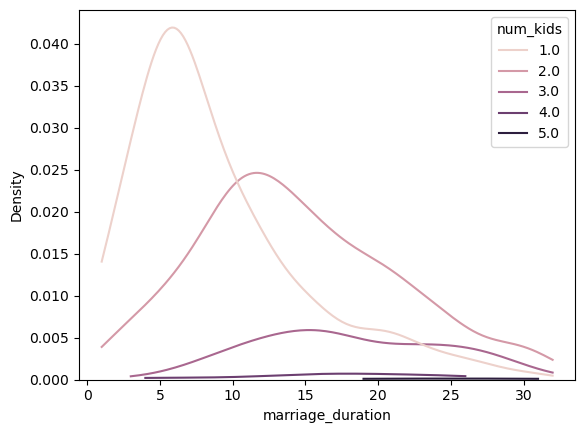

In [93]:
sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids", cut=0)
plt.show()

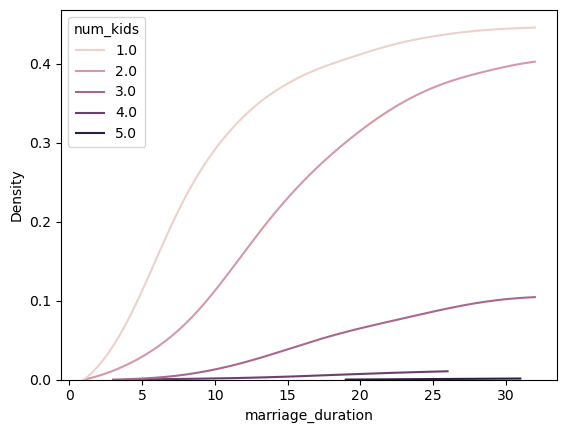

In [99]:
sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids", cut=0, cumulative=True)
plt.show()
#le graphique montre la probabilité cumulée d'observer une durée de mariage inférieure ou égale à une certaine valeur sur l'axe X. En d'autres termes, il représente la proportion de mariages ayant une durée de mariage inférieure ou égale à chaque point de l'axe X.